In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Test example

In [2]:
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5],[1,2]], cluster_std=1, random_state=42)

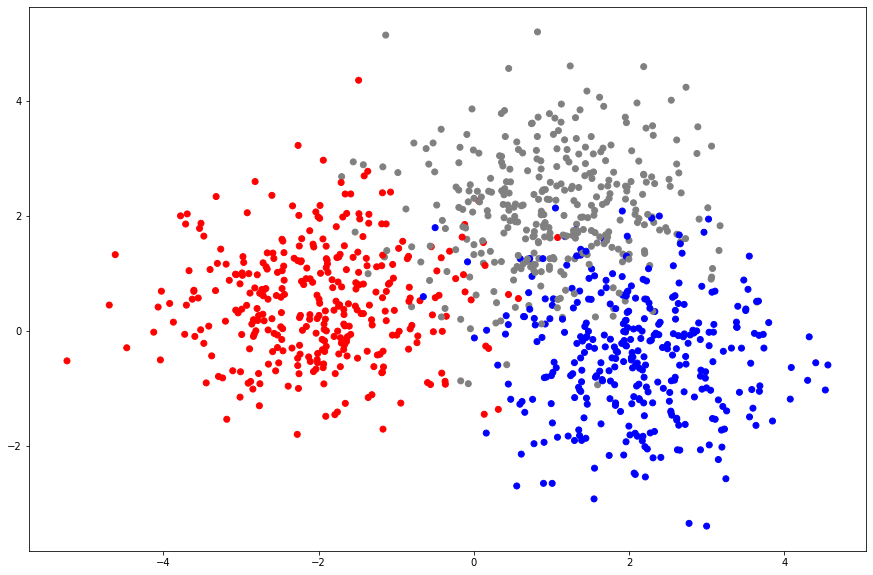

In [3]:
colors = ['red', 'blue', 'grey']
colors_y = []
for i in range(len(y)):
    colors_y.append(colors[y[i]])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colors_y)
plt.show()

# KMeans / SoftKmeans

In [4]:
def euclidean_distance(a, b):
    P = np.add.outer(np.sum(a**2, axis=1), np.sum(b**2, axis=1))
    N = np.dot(a, b.T)
    return np.sqrt(P - 2*N)

In [5]:
def cosine_distance(a, b):
    P = np.outer(np.sum(a**2, axis=1), np.sum(b**2, axis=1))
    N = np.dot(a, b.T)
    return 1 - N / np.sqrt(P)

In [6]:
class Kmeans:
    def __init__(self, n_cluster: int, metric):
        self.n_cluster = n_cluster
        self.centers = None
        if metric == 'euclidean':
            self.metric = euclidean_distance
        elif metric == 'cosine':
            self.metric = cosine_distance
        else:
            # custom callable metric
            raise NotImplementedError
        
    def fit(self, X: np.ndarray, max_iter: int = 100):
        self.centers = X[np.random.choice(np.arange(len(X)), self.n_cluster, replace=False)]
        for i in range(max_iter):
            distance = self.metric(X, self.centers)
            inds = distance.argmin(axis=1)
            for i in range(len(self.centers)):
                self.centers[i] = X[inds == i].mean(axis=0)
        return self
        
    def predict(self, X) -> np.ndarray:
        distance = self.metric(X, self.centers)
        inds = distance.argmin(axis=1)
        return inds
    
    def predict_proba(self, X) -> np.ndarray:
        distance = self.metric(X, self.centers)
        return self._softmax(distance)
        
    def _softmax(self, z, beta=1):
        probabilities = np.zeros(z.shape)
        for i in range(len(z)):        
            probabilities[i] = np.exp(-beta * z[i])
        probabilities = probabilities/(probabilities.sum(axis=1, keepdims=True))
        return probabilities

In [7]:
kmeans = Kmeans(3, 'cosine')

In [8]:
kmeans.fit(X, max_iter=100)

In [9]:
preds = kmeans.predict(X)

In [10]:
kmeans.predict_proba(X).round(2)

array([[0.3 , 0.14, 0.56],
       [0.42, 0.1 , 0.48],
       [0.1 , 0.71, 0.2 ],
       ...,
       [0.49, 0.09, 0.42],
       [0.18, 0.27, 0.55],
       [0.63, 0.09, 0.28]])

In [11]:
kmeans.centers

array([[ 2.1293252 , -0.61956812],
       [-2.08172857,  0.49544936],
       [ 1.06585312,  2.08770206]])

# Test Kmeans

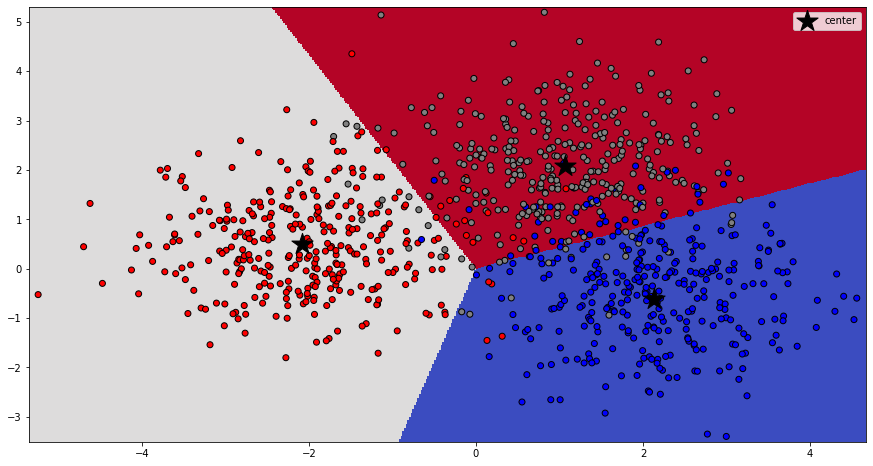

In [12]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='coolwarm', shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=colors_y, edgecolors='black')
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c='black', s=500, marker='*', label='center')
plt.legend()
plt.show()

# Test SoftKmeans

In [13]:
kmeans = Kmeans(2, 'euclidean')

In [14]:
kmeans.fit(X, max_iter=100)

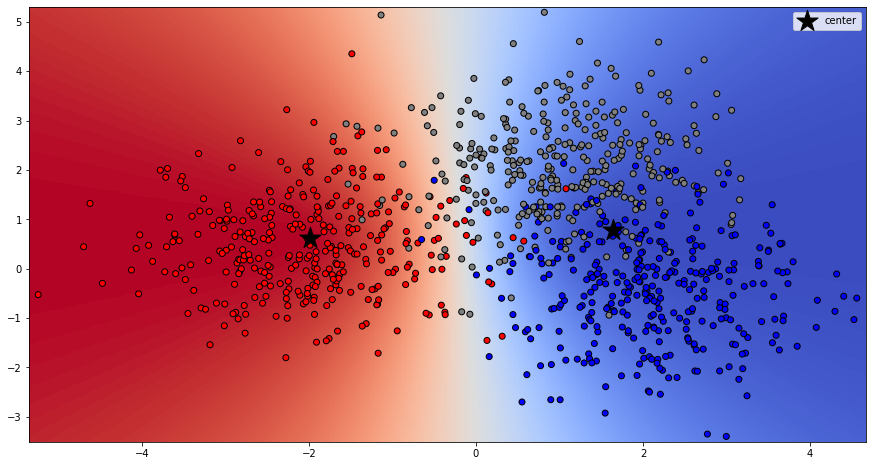

In [15]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = kmeans.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='coolwarm', shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=colors_y, edgecolors='black')
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c='black', s=500, marker='*', label='center')
plt.legend()
plt.show()